Original Data:
   Color Size
0    Red    S
1   Blue    M
2  Green    L
3   Blue    S
4    Red    M

Encoded Data:
   Color  Size
0      2     2
1      0     1
2      1     0
3      0     2
4      2     1

Data with Cluster Labels:
   Color  Size  Cluster
0      2     2        1
1      0     1        0
2      1     0        0
3      0     2        0
4      2     1        1


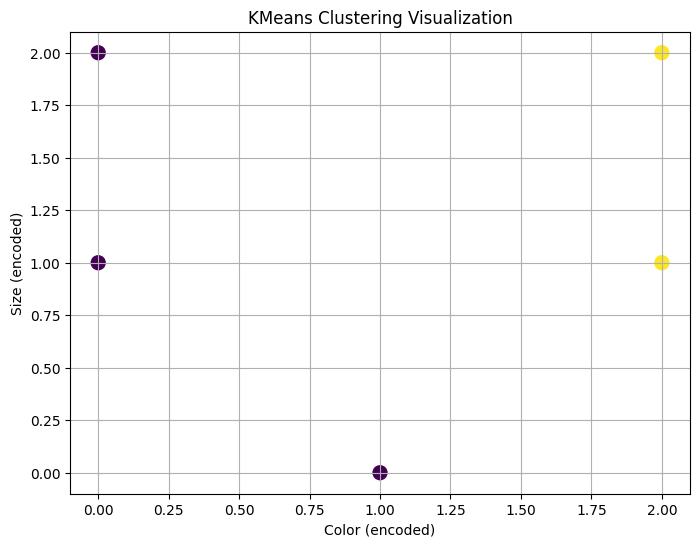

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Example data
data = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size': ['S', 'M', 'L', 'S', 'M']
})

print("Original Data:")
print(data)

# Step 1: Encode categorical columns
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

print("\nEncoded Data:")
print(data)

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)

# Step 3: Assign cluster labels
data['Cluster'] = kmeans.labels_

print("\nData with Cluster Labels:")
print(data)

# Step 4: Visualization
plt.figure(figsize=(8,6))
plt.scatter(data['Color'], data['Size'], c=data['Cluster'], cmap='viridis', s=100)
plt.title('KMeans Clustering Visualization')
plt.xlabel('Color (encoded)')
plt.ylabel('Size (encoded)')
plt.grid(True)
plt.show()


Original Data:
   Color Size
0    Red    S
1   Blue    M
2  Green    L
3   Blue    S
4    Red    M

Encoded Data:
   Color  Size
0      2     2
1      0     1
2      1     0
3      0     2
4      2     1


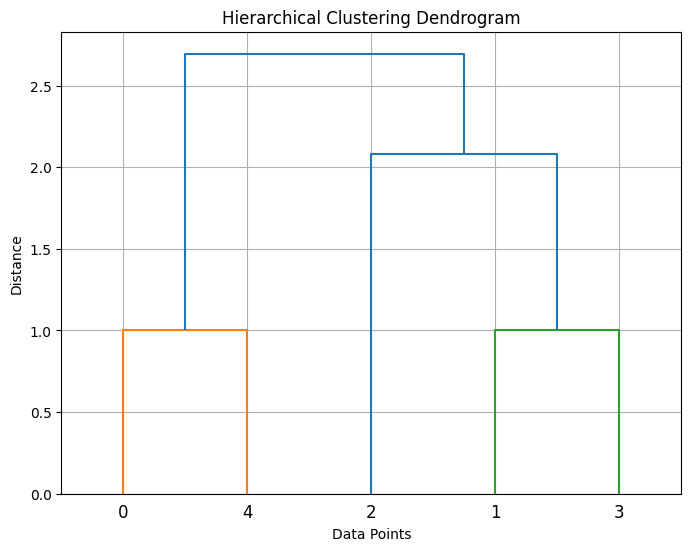

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Example data
data = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size': ['S', 'M', 'L', 'S', 'M']
})

print("Original Data:")
print(data)

# Step 1: Encode categorical columns
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

print("\nEncoded Data:")
print(data)

# Step 2: Create linkage matrix
linked = linkage(data, method='ward')  # 'ward' minimizes variance

# Step 3: Plot Dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linked,
           labels=range(len(data)),
           distance_sort='descending',
           )
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


Original Transaction Data:
   Bread  Butter  Milk  Jam
0      1       1     0    0
1      0       1     1    0
2      1       1     1    1
3      1       0     1    1
4      0       0     1    1

Frequent Itemsets:
   support     itemsets
0      0.6      (Bread)
1      0.6     (Butter)
2      0.8       (Milk)
3      0.6        (Jam)
4      0.6  (Milk, Jam)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0      (Milk)       (Jam)                 0.8                 0.6      0.6   
1       (Jam)      (Milk)                 0.6                 0.8      0.6   

   confidence  lift  representativity  leverage  conviction  zhangs_metric  \
0        0.75  1.25               1.0      0.12         1.6            1.0   
1        1.00  1.25               1.0      0.12         inf            0.5   

   jaccard  certainty  kulczynski  
0     0.75      0.375       0.875  
1     0.75      1.000       0.875  


C:\Users\Mithil Bhatt\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


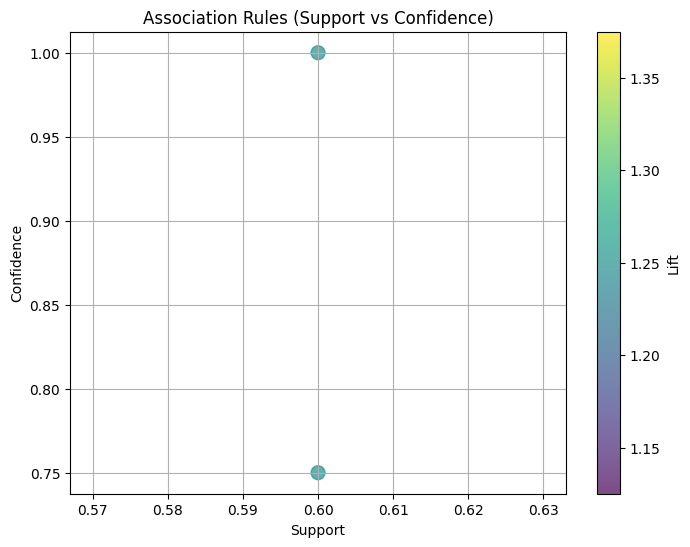

In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Example data (transactions)
data = pd.DataFrame({
    'Bread': [1, 0, 1, 1, 0],
    'Butter': [1, 1, 1, 0, 0],
    'Milk': [0, 1, 1, 1, 1],
    'Jam': [0, 0, 1, 1, 1]
})

print("Original Transaction Data:")
print(data)

# Step 1: Apply Apriori
frequent_itemsets = apriori(data, min_support=0.5, use_colnames=True)

print("\nFrequent Itemsets:")
print(frequent_itemsets)

# Step 2: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("\nAssociation Rules:")
print(rules)
# Step 3: Visualization - Plot confidence vs lift
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c=rules['lift'], cmap='viridis', s=100)
plt.colorbar(label='Lift')
plt.title('Association Rules (Support vs Confidence)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()


In [4]:
data.shape[0]

5